In [54]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**Derivative of a Simple Function**

In [55]:
def f(x) -> float:
    return 3 * x**2 - 4 * x + 5

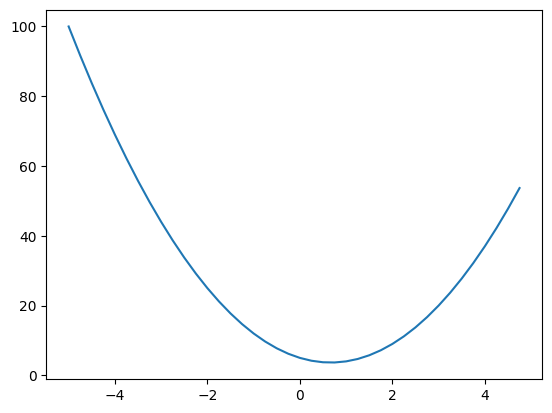

In [56]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)

plt.plot(xs, ys)

In [57]:
def df(x) -> float:
    return 6 * x - 4

In [58]:
def numerical(x, h: float = 0.001) -> float:
    return (f(x + h) - f(x)) / h

In [59]:
for h in [0.1, 0.001, 0.0001, 0.00001, 0.000001]:
    print(abs(numerical(4, h=h) - df(4)))

0.2999999999999403
0.0030000000026575435
0.00029999997821050783
2.9998357149452204e-05
2.990627763210796e-06


**A Function with Multiple Inputs**

In [60]:
def f(a, b, c) -> float:
    return a * b + c

In [61]:
h = 0.00001

a = 2.0
b = -3.0
c = 10.0

# dy/da
(f(a + h, b, c) - f(a, b, c)) / h
# dy/db
(f(a, b + h, c) - f(a, b, c)) / h
# dy/dc
(f(a, b, c + h) - f(a, b, c)) / h

0.9999999999621422

**The `Value` Object**

In [ ]:
from __future__ import annotations


class Value:
    def __init__(
        self,
        data: float | int,
        _children: tuple[Value, ...] = (),
        _op="",
        label="",
    ):
        # the data maintained by this object
        self.data = data
        # the gradient of the output of the graph w.r.t this node
        self.grad = 0.0
        # a human-readable label for this node
        self.label = label

        # the function for computing the local gradient
        self._backward = lambda: None
        # the ancestors of this node in the graph
        self._prev = set(_children)
        # the operation used to compute this node
        self._op = _op

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other: float | int | Value) -> Value:
        # wrap other in a Value if not already
        other = other if isinstance(other, Value) else Value(other)

        out = Value(self.data + other.data, (self, other), "+")

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward

        return out

    def __radd__(self, other: float | int | Value) -> Value:
        return self + other

    def __mul__(self, other: float | int | Value) -> Value:
        other = other if isinstance(other, Value) else Value(other)

        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    def __rmul__(self, other: float | int | Value) -> Value:
        return self * other

In [63]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")

y = a * b + c
y

Value(data=4.0)

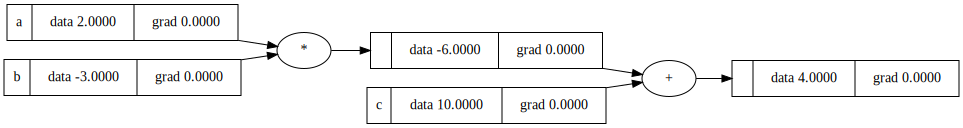

In [64]:
from micrograd.util.draw import draw_dot

draw_dot(y)

**Manual Backpropagation**

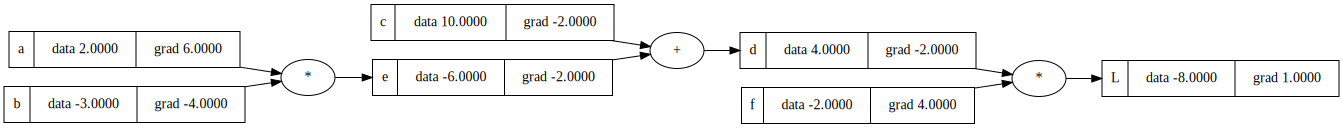

In [76]:
a = Value(2.0, label="a")
a.grad = 6.0
b = Value(-3.0, label="b")
b.grad = -4.0
c = Value(10.0, label="c")
c.grad = -2.0
e = a * b
e.label = "e"
e.grad = -2.0
d = e + c
d.label = "d"
d.grad = -2.0
f = Value(-2.0, label="f")
f.grad = 4.0
L = d * f
L.label = "L"
L.grad = 1.0

draw_dot(L)

In [77]:
def fn():
    h = 0.001

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "L"
    L1 = L.data

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "L"
    L2 = L.data

    return (L2 - L1) / h


fn()

0.0

**Implementing `.backward()`**